![](PL2.jpg)

  >An airplane or aeroplane (informally plane) is a powered, fixed-wing aircraft that is propelled forward by thrust from a jet engine, propeller or rocket engine. Airplanes come in a variety of sizes, shapes, and wing configurations. The broad spectrum of uses for airplanes includes recreation, transportation of goods and people, military, and research. Worldwide, commercial aviation transports more than four billion passengers annually on airliners[1] and transports more than 200 billion tonne-kilometers[2] of cargo annually, which is less than 1% of the world's cargo movement.[3] Most airplanes are flown by a pilot on board the aircraft, but some are designed to be remotely or computer-controlled such as drones.

# Preliminary Wrangling: 

## 1) Data Wrangling 

In [2]:
#Request the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
data = pd.read_csv('plane-data.csv')
data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

data.shape

(5029, 9)

In [5]:
#Browse columns:
data.columns

Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

In [6]:
#Find if the data contains missing values or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


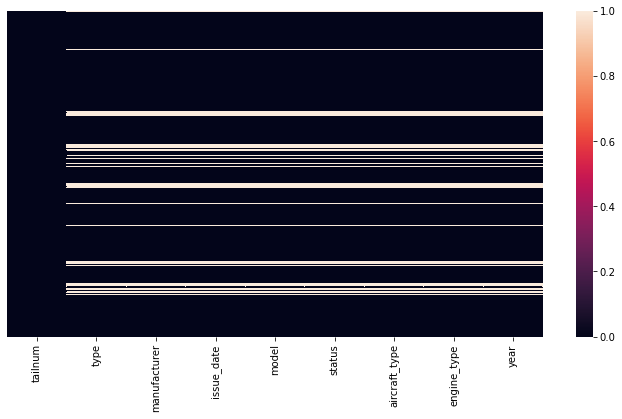

In [7]:
#Find missing data in columns through graphical visualization
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),yticklabels=False);

In [8]:
data.isnull().sum()

tailnum            0
type             549
manufacturer     549
issue_date       549
model            549
status           549
aircraft_type    549
engine_type      549
year             549
dtype: int64

In [9]:
#Find if your data contains duplicate values
data.tailnum.duplicated().sum()

0

In [10]:
#Delete a value "None"

data = data.replace(to_replace='None', value=np.nan).dropna()
data.isnull().sum()


tailnum          0
type             0
manufacturer     0
issue_date       0
model            0
status           0
aircraft_type    0
engine_type      0
year             0
dtype: int64

In [11]:
data.shape

(4332, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4332 entries, 34 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        4332 non-null   object
 1   type           4332 non-null   object
 2   manufacturer   4332 non-null   object
 3   issue_date     4332 non-null   object
 4   model          4332 non-null   object
 5   status         4332 non-null   object
 6   aircraft_type  4332 non-null   object
 7   engine_type    4332 non-null   object
 8   year           4332 non-null   object
dtypes: object(9)
memory usage: 338.4+ KB


In [13]:
data.head(2)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998


---
---

In [14]:
# Correctly adjust asynchronous date problems with each other
# One of the quality problems found here with the data is that in the date
# classification the incompatible years.
# There are years that differ from date columns
# Write the code:

data['issue_date'] = pd.to_datetime(data['issue_date'], infer_datetime_format=True)
data['years']=data['issue_date'].dt.strftime('%Y')

In [15]:
data['issue_date'] = pd.to_datetime(data['issue_date'], infer_datetime_format=True)
data['month_years']=data['issue_date'].dt.strftime('%Y-%b')

In [16]:
data_archive= data.copy()
data_archive.head(3)


## Code testing:

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,years,month_years
34,N10156,Corporation,EMBRAER,2004-02-13,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004,2004,2004-Feb
35,N102UW,Corporation,AIRBUS INDUSTRIE,1999-05-26,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998,1999,1999-May
36,N10323,Corporation,BOEING,1997-07-01,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986,1997,1997-Jul


In [17]:
data_archive=data_archive[['years','month_years','tailnum','manufacturer','model','type','engine_type','aircraft_type','status']]
data_archive=data_archive.copy()
data_archive.head(3)

,years,month_years,tailnum,manufacturer,model,type,engine_type,aircraft_type,status
34,2004,2004-Feb,N10156,EMBRAER,EMB-145XR,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
35,1999,1999-May,N102UW,AIRBUS INDUSTRIE,A320-214,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
36,1997,1997-Jul,N10323,BOEING,737-3TO,Corporation,Turbo-Jet,Fixed Wing Multi-Engine,Valid


---
---


---
---

## 2) Data Analysis: 

![](PL3.jpg)

## The following questions will be discussed:

### A - for " years - months ": 
1) How will the data for the years be analyzed ?

2) What are the years in which the number of trips increased ?

3) In the 1990s and 1980s, what years did you record a large number of flights?

4) What are the most effective months for trips?

5) What are the years that recorded the highest record after 1/1/2000 ?

6) What are the months affected the most by the aviation industry?

7) What is the conclusion and perception of the increase in the number of years and the number of trips during the mentioned period ?

## B - the manufacturer's :
1) What are the most powerful companies in the aviation industry?

2) What were the manufacturer's statistics before 1/1/2000?

3) What are the manufacturer's statistics after 1/1/2000?

4) Based on the statistics, what are the expectations of increased growth between companies?

## C- The Model :
1) From 1976 to 2008 what are the three most popular models among airlines ?!

2) What are the models most used in the aviation industry?

3) What are the models that were relied upon before 1/1/2000?

4) What are the models adopted in the aviation industry after 1/1/2000?

## D- Type :
1) What was the most popular type 1976-2008?

2) What is the most common type 1976-2000?

3) What is the most common type 2000-2001?

4) What are the strongest manufacturers of the Corporation type ?!

5) What are the strongest manufacturers of the Individual type ?!

## E- Engine Type :
1) What are the most popular types of engines in 1976-2008?

2) What types of engines were used in 1976-2000?

3)  Comparison of Demand for Engine Types in the "Pre-2000 and Post-2000" Periods :

## F- Manufacturer BOEING :
1) What are the most active years?

2) What is the growth of the company ?! Is it a positive or negative relationship ?

3) What are the most used models?

4) What are the most common engines?

5) What is the most effective month?

## G- BOMBARDIER_INC :
1) What is the most active year?

2) What is the most active month in air navigation?

3) What is the model most used and applied?

4) What are the most active months in using the most common model?


## H- EMBRAER :

1) What was the first engine type recorded in the data and in what year?

2) What is the most active month in air traffic, and how many flights are registered?

3) What is the general activity of EMBRAER in air navigation traffic?

4) What is the most common model in EMBRAER?

5) What is the activity log for the most popular model ?

6) What does the airline EMBRAER depend on for its engines?



---
---

# A - for " years - months ":

## 1) How will the data for the years be analyzed ?

In [18]:
#Most of the years I have been in flight
years=data_archive['years'].value_counts()
years.head(60)


2004    454
2007    335
2005    334
2001    332
2003    318
2000    311
2002    305
1999    297
2006    245
1998    239
1997    133
1996    108
1992    101
2008    101
1991     99
1995     84
1989     82
1990     80
1994     75
1986     74
1988     70
1993     66
1987     52
1985     33
1984      2
1976      1
1978      1
Name: years, dtype: int64

In [19]:
data_archive.years.value_counts(normalize=True)*100

2004    10.480148
2007     7.733149
2005     7.710065
2001     7.663897
2003     7.340720
2000     7.179132
2002     7.040628
1999     6.855956
2006     5.655586
1998     5.517082
1997     3.070175
1996     2.493075
1992     2.331487
2008     2.331487
1991     2.285319
1995     1.939058
1989     1.892890
1990     1.846722
1994     1.731302
1986     1.708218
1988     1.615882
1993     1.523546
1987     1.200369
1985     0.761773
1984     0.046168
1976     0.023084
1978     0.023084
Name: years, dtype: float64

In [20]:
#organize this data in tables:

all_years=pd.DataFrame({'years':[2004,2007,2005,2001,2003,2000,2002,1999,2006,1998,1997,1996,2008,
                                 1992,1991,1995,1989,1990,1994,1986,1988,1993,1987,1985,1984,1978,1976],
                       
                        'counts':[454,335,334,332,318,311,305,297,245,239,133,108,101,101,99,84,82,80,75,
                              74,70,66,52,33,2,1,1 ]},
index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27] )

all_years=all_years.sort_values('years')

In [21]:
all_years

,years,counts
27,1976,1
26,1978,1
25,1984,2
24,1985,33
20,1986,74
23,1987,52
21,1988,70
17,1989,82
18,1990,80
15,1991,99



### Note that the years span from 1976 to 2008
I will study it in general first, then for a more careful study I will divide the time period 1976-2008 into two parts:

1) Before 1/1/2000

2) After the year 1/1/2002

## 2) What are the years in which the number of trips increased ?

/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


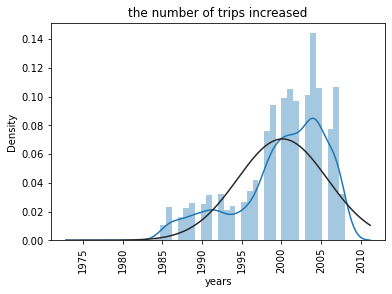

In [22]:
# A visualization of the flight activity over all the years
sns.distplot(data_archive.years ,fit=norm );
plt.xticks(rotation = 90);
plt.title('the number of trips increased');
 

## Conclusions in general : 

1) We note that the trips began in 1976

2) Data recorded from 1976 to 2008

3) The most active year in air travel is 2004, when 454 different flights were witnessed

4) Compared to the years of the millennium, 1999 and 1998 were good years with significant air    traffic activity

5) Relative to the increase in the aviation industry, we notice a direct change in the number of years and an increase in flights.

6) The percentage of activity witnessed in 2004 = 10%, and it was an increase of 3% over the year 2007

---
---

#  before 1/1/2000 :
                               [1976 - 1999]

In [23]:

before_2000= data_archive.loc[data_archive['years']<= '1999' ,['years','month_years','tailnum','manufacturer',
                                     'model','type','engine_type','aircraft_type','status']].sort_values('years')
before_2000

,years,month_years,tailnum,manufacturer,model,type,engine_type,aircraft_type,status
2473,1976,1976-Jan,N567AA,DEHAVILLAND,OTTER DHC-3,Individual,Reciprocating,Fixed Wing Single-Engine,Valid
1834,1978,1978-Mar,N444AA,CESSNA,182P,Individual,Reciprocating,Fixed Wing Single-Engine,Valid
971,1984,1984-Dec,N300SW,BOEING,737-3H4,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
698,1984,1984-Jan,N227AA,MCDONNELL DOUGLAS,DC-9-82(MD-82),Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
128,1985,1985-Oct,N12313,BOEING,737-3TO,Corporation,Turbo-Jet,Fixed Wing Multi-Engine,Valid
...,...,...,...,...,...,...,...,...,...
3386,1999,1999-Feb,N708AS,BOEING,737-490,Corporation,Turbo-Jet,Fixed Wing Multi-Engine,Valid
3385,1999,1999-Dec,N708AE,EMBRAER,EMB-135LR,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
3380,1999,1999-Nov,N707EB,EMBRAER,EMB-135LR,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
3366,1999,1999-Oct,N705AE,EMBRAER,EMB-135LR,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid


### First, a study of the normal distribution of flight activity during 
                       [1976 - 1999]

/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


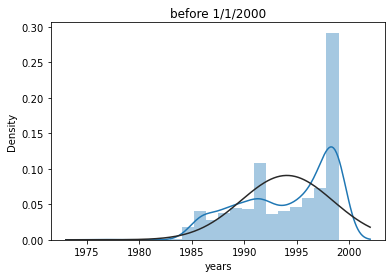

In [24]:

sns.distplot(before_2000.years, fit=norm );
plt.title('before 1/1/2000');

Note that we have a negative skew that occurs if the data is stacked to the right, leaving the tail pointing to the left. The reason that the deviation here is negative is what naturally occurs with the industrial revolution in the aviation industry, aircraft and so on, as we witness that as the years progress, civilization, culture and industry increase

In [25]:
before_2000.years.value_counts(normalize=True)*100

1999    18.597370
1998    14.965560
1997     8.328115
1996     6.762680
1992     6.324358
1991     6.199123
1995     5.259862
1989     5.134627
1990     5.009393
1994     4.696306
1986     4.633688
1988     4.383219
1993     4.132749
1987     3.256105
1985     2.066374
1984     0.125235
1976     0.062617
1978     0.062617
Name: years, dtype: float64

## 3) In the 1990s and 1980s, what years did you record a large number of flights?

In general, the graphic display shows the most active year, as the year [1991,1992] witnessed good activity in the flights, then the flights decreased during the period 1993-1995 and increased positively again.

The year 1999 was the most active year, reaching 18%, a difference of 4% from 1998, and 1989 was one of the good years and its activity was remarkable, i.e. 80'S , as it witnessed activity with an increase of 1% over 1994 , 90's , although the difference in years Between the two periods equals 3 years

## 4) What are the most effective months for trips?

In [26]:
be_month_years=before_2000['month_years'].value_counts()
be_month_years.head(20)

1999-Dec    53
1998-Jul    39
1986-Dec    38
1999-Sep    36
1998-Dec    36
1999-Jun    30
1999-Aug    28
1998-Jun    24
1999-Jan    24
1998-Oct    22
1998-Feb    21
1996-Jul    21
1999-Mar    20
1999-May    20
1998-Sep    19
1999-Oct    19
1992-Jun    19
1998-May    18
1999-Nov    18
1998-Aug    18
Name: month_years, dtype: int64

In [27]:
month_years_90=pd.DataFrame({'month_years':['1999-Dec',
'1998-Jul',
'1986-Dec',
'1998-Dec',
'1999-Sep',
'1999-Jun',
'1999-Aug',
'1998-Jun',
'1999-Jan',
'1998-Oct',
'1998-Feb',
'1996-Jul',
'1999-May',
'1999-Mar',
'1992-Jun',
'1999-Oct',
'1998-Sep',
'1998-May',
'1991-Jul',
'1999-Nov'],
                       
'counts':[53,
39,
38,
36,
36,
30,
28,
24,
24,
22,
21,
21,
20,
20,
19,
19,
19,
18,
18,
18]},
index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] )

month_years_90

,month_years,counts
1,1999-Dec,53
2,1998-Jul,39
3,1986-Dec,38
4,1998-Dec,36
5,1999-Sep,36
6,1999-Jun,30
7,1999-Aug,28
8,1998-Jun,24
9,1999-Jan,24
10,1998-Oct,22


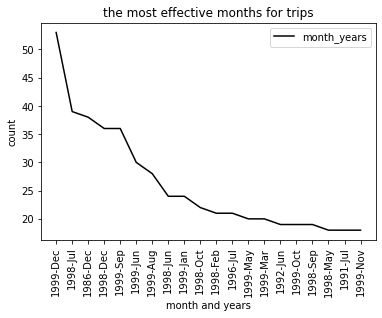

In [28]:
a=month_years_90.month_years
b=month_years_90.counts



plt.plot(a,b,'k')

plt.legend(['month_years','counts'])
plt.title('the most effective months for trips')
plt.xlabel('month and years')
plt.xticks(rotation = 90)
plt.ylabel('count')

plt.show()

For more in-depth study, we will explore the months, and note through the graph that November 1999 is the lowest month for flights

On the other hand, December 1999 was the month that witnessed the largest increase in flight activity, with approximately 53 flights for different airlines, and July of 1998 was in second place if it contained 39 flights for various airlines, We note here that the difference = 14 flights. The increase is recorded here for the month of December 1999
  December 1986 also witnessed excellent activity, if it recorded 38 flights, which is considered a very good number since it is in 80's

------
------

# after 1/1/2000 :

In [29]:

after_2000=data_archive.loc[data_archive['years'] > '1999' ,['years','month_years','tailnum','manufacturer',
                                     'model','type','engine_type','aircraft_type','status']].sort_values('years')
after_2000

,years,month_years,tailnum,manufacturer,model,type,engine_type,aircraft_type,status
4081,2000,2000-Dec,N825MH,BOEING,767-432ER,Corporation,Turbo-Jet,Fixed Wing Multi-Engine,Valid
3732,2000,2000-Nov,N77258,BOEING,737-824,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
3742,2000,2000-Aug,N772SW,BOEING,737-7H4,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
3746,2000,2000-Jul,N77331,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
2147,2000,2000-Mar,N503SW,BOEING,737-5H4,Corporation,Turbo-Jet,Fixed Wing Multi-Engine,Valid
...,...,...,...,...,...,...,...,...,...
1459,2008,2008-Jun,N378AA,CESSNA,172E,Individual,Reciprocating,Fixed Wing Single-Engine,Valid
4572,2008,2008-May,N916WN,BOEING,737-7H4,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
1404,2008,2008-Mar,N37419,BOEING,737-924ER,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid
1340,2008,2008-Jan,N368CA,BOMBARDIER INC,CL-600-2C10,Corporation,Turbo-Fan,Fixed Wing Multi-Engine,Valid


## 5) What are the years that recorded the highest record after 1/1/2000 ?

In [30]:
after_2000.years.value_counts()

2004    454
2007    335
2005    334
2001    332
2003    318
2000    311
2002    305
2006    245
2008    101
Name: years, dtype: int64

/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


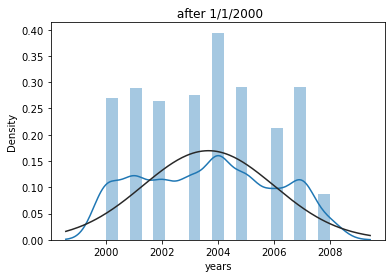

In [31]:
from scipy.stats import norm
sns.distplot(after_2000.years, fit=norm );
plt.title(' after 1/1/2000');

It is clear that the new millennium years began with high inflation in the airline industry, there is a high jump starting in 2001, which witnessed 332 different flights.
And the year that contain a high record in air travel is the year 2004, when 454 different flights were monitored.

## 6) What are the months affected the most by the aviation industry?

In [32]:
month_years=after_2000['month_years'].value_counts()
month_years.head(20)

2004-May    99
2005-Sep    74
2000-Oct    64
2004-Apr    53
2003-Jun    52
2001-May    46
2000-Aug    43
2007-Jul    41
2007-Dec    41
2004-Oct    41
2005-Feb    39
2007-Jun    39
2004-Jun    38
2002-Jan    38
2007-Aug    37
2006-Feb    37
2002-May    37
2000-Sep    37
2006-Jul    34
2000-Nov    34
Name: month_years, dtype: int64

In [33]:



most_month=pd.DataFrame(
{'month':[
'2004-May',
'2005-Sep',
'2000-Oct',
'2004-Apr',
'2003-Jun',
'2001-May',
'2000-Aug',
'2004-Oct',
'2007-Dec',
'2007-Jul',
'2007-Jun',
'2005-Feb',
'2002-Jan',
'2004-Jun',
'2006-Feb',
'2000-Sep',
'2007-Aug',
'2002-May',
'2006-Jul',
'2001-Aug'],
    

'counts':[99,
74,
64,
53,
52,
46,
43,
41,
41,
41,
39,
39,
38,
38,
37,
37,
37,
37,
34,
34]},

index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] )

most_month

,month,counts
1,2004-May,99
2,2005-Sep,74
3,2000-Oct,64
4,2004-Apr,53
5,2003-Jun,52
6,2001-May,46
7,2000-Aug,43
8,2004-Oct,41
9,2007-Dec,41
10,2007-Jul,41


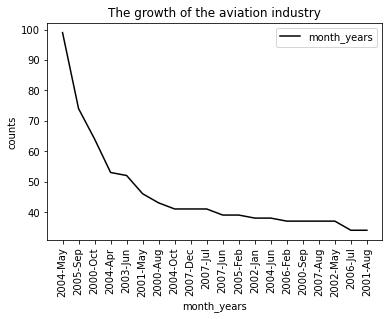

In [34]:
a=most_month.month
b=most_month.counts



plt.plot(a,b,'k')

plt.legend(['month_years','counts'])
plt.title('The growth of the aviation industry')
plt.xlabel('month_years')
plt.xticks(rotation = 90)
plt.ylabel('counts')

plt.show()

We note the air industrial jump that occurred in the new millennium, it is clear that there is growth in the aviation industry, as the month of May of 2004 recorded a high record of flights, 99 flights for various airlines
While 74 flights were recorded in September of 2005, that is, there is a difference of 25 flights in the record of May of 2004, "I expect that there was an occasion in that month."

We also note that over 8 months, there has been a noticeable flight activity, which is months in a period extending from 2000-2005
= 429

## 7) What is the conclusion and perception of the increase in the number of years and the number of trips during the mentioned period ?

> Aviation is one of the most “global” industries: connecting people, cultures and businesses across continents. Colleagues throughout the sector are committed to raising awareness of the benefits and the role of aviation. It is necessary for all stakeholders and partners to work together to maximize the benefits of air transport, and to support the sustainable growth of aviation by connecting more people and more places, more often.

Aviation has continued to expand. It has weathered crises and demonstrated long-term resilience, becoming an indispensable means of transport. Historically, air transport has doubled in size every 15 years and has grown faster than most other industries. In 2016, airlines worldwide carried around 3.8 billion passengers annually with 7.1 trillion revenue passenger kilometres (RPKs). Fifty three million tonnes of freight were transported by air, reaching 205 billion freight tonne kilometres (FTKs). Every day, around 100,000 flights transport over 10 million passengers and around USD18 billion worth of goods.

----
----

# B- The manufacturer's

![](pl10.jpg)

## 1) What are the most powerful companies in the aviation industry?

In [35]:
manufacturer=data_archive['manufacturer'].value_counts()
manufacturer

BOEING                            2025
EMBRAER                            569
BOMBARDIER INC                     520
AIRBUS INDUSTRIE                   422
MCDONNELL DOUGLAS                  252
AIRBUS                             237
MCDONNELL DOUGLAS AIRCRAFT CO      105
CANADAIR                            85
DOUGLAS                             36
DEHAVILLAND                         15
MCDONNELL DOUGLAS CORPORATION       14
CESSNA                              12
PIPER                                6
BEECH                                5
SAAB-SCANIA                          5
AEROSPATIALE/ALENIA                  4
MAULE                                2
GULFSTREAM AEROSPACE                 2
MARZ BARRY                           1
BELL                                 1
MORSE GEORGE JR                      1
LEBLANC GLENN T                      1
COBB INTL/DBA ROTORWAY INTL IN       1
SIKORSKY                             1
AERONCA                              1
HELIO                    

In [36]:
manufacturer_1=data_archive['manufacturer'].value_counts()

manufacturer_1.sum(axis=0)

4332

In [37]:
most_manufacturer_all_years=pd.DataFrame(
{'manufacturer':['BOEING',
'EMBRAER',
'BOMBARDIER INC',
'AIRBUS INDUSTRIE',
'MCDONNELL DOUGLAS',
'AIRBUS',
'MCDONNELL DOUGLAS AIRCRAFT CO',
'CANADAIR',
'DOUGLAS',
'DEHAVILLAND',
'MCDONNELL DOUGLAS CORPORATION',
'CESSNA',
'PIPER']
,
                       
'counts':[2025,
569,
520,
422,
252,
237,
105,
85,
36,
15,
14,
12,
6]},

index=[1,2,3,4,5,6,7,8,9,10,11,12,13] )

most_manufacturer_all_years

,manufacturer,counts
1,BOEING,2025
2,EMBRAER,569
3,BOMBARDIER INC,520
4,AIRBUS INDUSTRIE,422
5,MCDONNELL DOUGLAS,252
6,AIRBUS,237
7,MCDONNELL DOUGLAS AIRCRAFT CO,105
8,CANADAIR,85
9,DOUGLAS,36
10,DEHAVILLAND,15


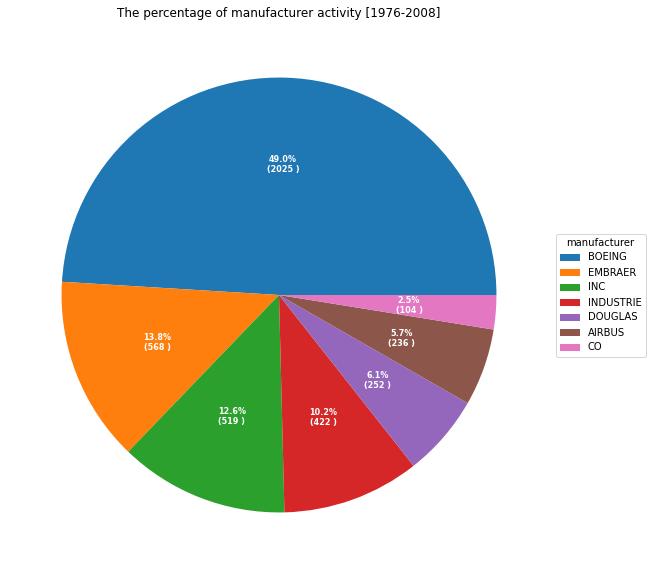

In [38]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

recipe = [
'2025 BOEING',                            
'569 EMBRAER',                           
'520 BOMBARDIER INC',                     
'422 AIRBUS INDUSTRIE',                   
'252 MCDONNELL DOUGLAS',                  
'237 AIRBUS',                             
'105  MCDONNELL DOUGLAS AIRCRAFT CO',      
]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

plt.xticks(rotation = 90);
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="manufacturer",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("The percentage of manufacturer activity [1976-2008]")

plt.show()


At the level of the two decades, the most active company is BOEING, where there are about 2025 in its records, starting from 1984-2008, which is a total of 49% of all the remaining flights for the different companies in that period of time.

In second place is EMBRAER, with a rate of 14%, it recorded 568 different flights in its balance from 1993 to 2008.

## 2) What were the manufacturer's statistics before 1/1/2000?

In [39]:
manufacturer=before_2000['manufacturer'].value_counts()
manufacturer

BOEING                            884
MCDONNELL DOUGLAS                 212
AIRBUS INDUSTRIE                  145
EMBRAER                           133
MCDONNELL DOUGLAS AIRCRAFT CO      77
CANADAIR                           52
DOUGLAS                            32
MCDONNELL DOUGLAS CORPORATION      14
BOMBARDIER INC                     12
DEHAVILLAND                         9
CESSNA                              7
SAAB-SCANIA                         5
PIPER                               3
MAULE                               2
BEECH                               2
GULFSTREAM AEROSPACE                1
STINNETT RON                        1
AERO COMMANDER                      1
MORSE GEORGE JR                     1
MARZ BARRY                          1
LEBLANC GLENN T                     1
COBB INTL/DBA ROTORWAY INTL IN      1
AERONCA                             1
Name: manufacturer, dtype: int64

In [40]:
old_manufacturer=pd.DataFrame(
{'manufacturer':['BOEING',
'MCDONNELL DOUGLAS',
'AIRBUS INDUSTRIE',
'EMBRAER',
'MCDONNELL DOUGLAS AIRCRAFT CO',
'CANADAIR',
'DOUGLAS',
'MCDONNELL DOUGLAS CORPORATION',
'BOMBARDIER INC',
'DEHAVILLAND'],
                       
'counts':[884,
212,
145,
133,
77,
52,
32,
14,
12,
9]},

index=[1,2,3,4,5,6,7,8,9,10])

old_manufacturer
          
              
   

,manufacturer,counts
1,BOEING,884
2,MCDONNELL DOUGLAS,212
3,AIRBUS INDUSTRIE,145
4,EMBRAER,133
5,MCDONNELL DOUGLAS AIRCRAFT CO,77
6,CANADAIR,52
7,DOUGLAS,32
8,MCDONNELL DOUGLAS CORPORATION,14
9,BOMBARDIER INC,12
10,DEHAVILLAND,9


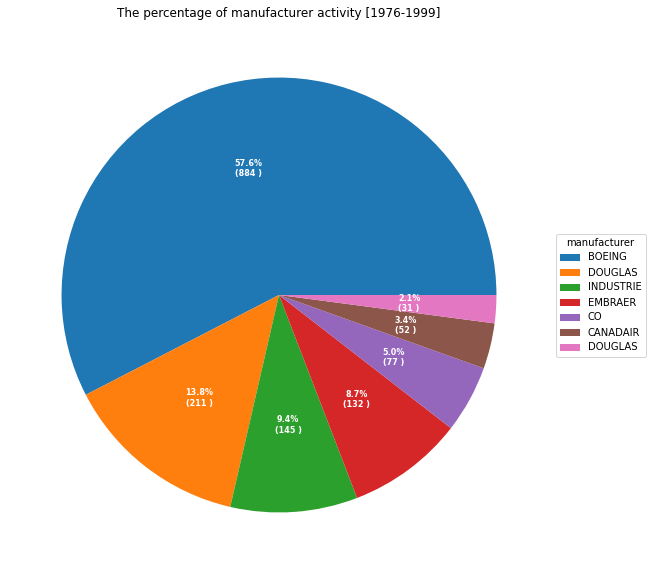

In [41]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

recipe = ['884  BOEING ',
'212  MCDONNELL DOUGLAS',
'145 AIRBUS INDUSTRIE ',
'133 EMBRAER ',
'77 MCDONNELL DOUGLAS AIRCRAFT CO',
'52 CANADAIR',
'32 DOUGLAS'
 ]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

plt.xticks(rotation = 90);
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="manufacturer",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("The percentage of manufacturer activity [1976-1999]")

plt.show()


Pre-2000,
The most effective company in the aviation industry is the rising company BOEING, with a 58% rate and 884 different flights

With a difference of 672 flights from the first place and by 14%, MCDONNELL DOUGLAS ranks second with a score of 212 different flights,

In third place with 9% was AIRBUS INDUSTRIE with a score of 133 different flights

## 3) What are the manufacturer's statistics after 1/1/2000?

In [42]:
manufacturer=after_2000['manufacturer'].value_counts()
manufacturer

BOEING                           1141
BOMBARDIER INC                    508
EMBRAER                           436
AIRBUS INDUSTRIE                  277
AIRBUS                            237
MCDONNELL DOUGLAS                  40
CANADAIR                           33
MCDONNELL DOUGLAS AIRCRAFT CO      28
DEHAVILLAND                         6
CESSNA                              5
AEROSPATIALE/ALENIA                 4
DOUGLAS                             4
BEECH                               3
PIPER                               3
BELL                                1
HELIO                               1
SIKORSKY                            1
BOEING OF CANADA LTD                1
WOBIG WAYNE R                       1
AGUSTA SPA                          1
GULFSTREAM AEROSPACE                1
AVIAT AIRCRAFT INC                  1
FRIEDEMANN JON                      1
DIAMOND AIRCRAFT IND INC            1
Name: manufacturer, dtype: int64

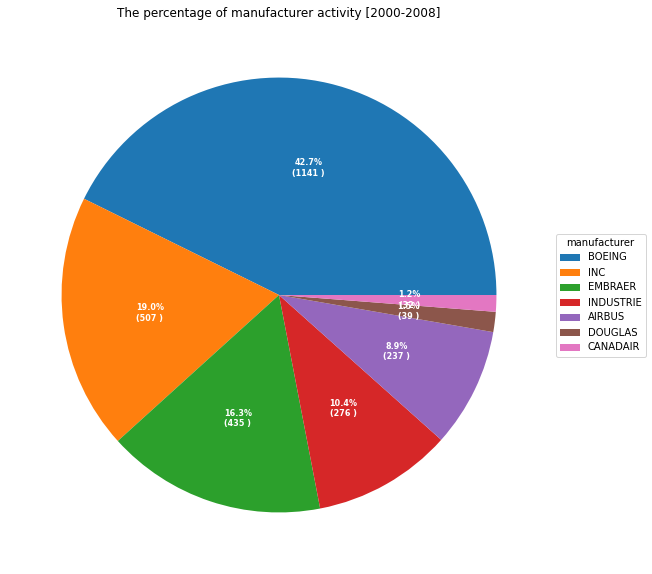

In [43]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

recipe = ['1141  BOEING',
'508  BOMBARDIER INC',
'436  EMBRAER',
'277  AIRBUS INDUSTRIE',
'237  AIRBUS',
'40  MCDONNELL DOUGLAS',
'33  CANADAIR'
 ]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

plt.xticks(rotation = 90);
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="manufacturer",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("The percentage of manufacturer activity [2000-2008]")

plt.show()

After 2000
We notice the great leap of BOEING as it moved to record 1141 flights in massive activity in just 8 years after 2000, a great industry and this is 43%

Also in the second most powerful airline, BOMBARDIER INC if it has 19% of the operational percentage, i.e. an average of 507 different flights

In third place, with 16% operating rate, the airline EMBRAER had 435 different flights

## 4) Based on the statistics, what are the expectations of increased growth between companies?

1) It is clear that BOEING has a high growth rate during the coming years, as we note that it has a growth rate in the years after 1/1/2000 estimated at 26% and that something from an economic and industrial point of view is very appropriate.

2) BOMBARDIER INC is a very strong and growing company in the aviation industry, with a growth rate of 12% company-wide

3) The third company with a growth of 10% is EMBRAER

---
---

# C- The Model :

![](pl6.jpg)



1) From 1976 to 2008 what are the three most popular models among airlines ?!

2) What are the models most used in the aviation industry?

3) What are the models that were relied upon before 1/1/2000?

4) What are the models adopted in the aviation industry after 1/1/2000?

## 1) From 1976 to 2008 what are the three most popular models among airlines ?!

In [44]:
model_1=data_archive['model'].value_counts()
model_1

CL-600-2B19    383
737-7H4        298
A320-232       236
EMB-145LR      213
CL-600-2C10    156
              ... 
737-282          1
FALCON-XP        1
690A             1
DC-7BF           1
KITFOX IV        1
Name: model, Length: 161, dtype: int64

In [45]:
model_2=data_archive['model'].value_counts(normalize=True)*100
model_2.head(10)

CL-600-2B19       8.841182
737-7H4           6.879040
A320-232          5.447830
EMB-145LR         4.916898
CL-600-2C10       3.601108
737-3H4           3.393352
DC-9-82(MD-82)    3.277932
MD-88             2.700831
757-232           2.562327
EMB-145XR         2.400739
Name: model, dtype: float64

# CL-600-2B19 
The Bombardier CRJ100 and CRJ200 (formerly known as the Canadair CRJ100 and CRJ200) is a family of regional airliners that was designed and manufactured by Bombardier Aerospace between 1991 and 2006 and is part of the Bombardier CRJ aircraft family. The CRJ was Canada's second civil jet airliner after the single prototype of the Avro Canada C102 Jetliner (which never entered commercial service).





# 737-7H4

Since its inception Southwest Airlines has almost exclusively operated Boeing 737 aircraft (except for a brief period when it leased and flew some Boeing 727-200 aircraft). Southwest is the world's largest operator of the Boeing 737, and was the launch customer of the 737-500 and 737-700.

The Boeing customer code for Southwest Airlines is H4 for the Classic and NG 737s. For example the -700 would be 737-7H4 and the -800 is 737-8H4. These codes do not apply to recent aircraft types including the 737 MAX.


# A320-232

The Airbus A320 family are narrow-body airliners designed and produced by Airbus. The A320 was launched in March 1984, first flew on 22 February 1987, and was introduced in April 1988 by Air France. The first member of the family was followed by the longer A321 (first delivered in January 1994), the shorter A319 (April 1996), and the even shorter A318 (July 2003). Final assembly takes place in Toulouse in France; Hamburg in Germany; Tianjin in China since 2009; and in Mobile, Alabama in the United States since April 2016.


## 2)What are the models most used in the aviation industry?

In [46]:
most_model=pd.DataFrame(
{'model':['CL-600-2B19',
'737-7H4',
'A320-232',
'EMB-145LR',
'CL-600-2C10',
'737-3H4',
'DC-9-82(MD-82)',
'MD-88',
'757-232',
'EMB-145XR']
,
                       
'counts':[383,
298,
236,
213,
156,
147,
142,
117,
111,
104]},

index=[1,2,3,4,5,6,7,8,9,10] )

most_model

,model,counts
1,CL-600-2B19,383
2,737-7H4,298
3,A320-232,236
4,EMB-145LR,213
5,CL-600-2C10,156
6,737-3H4,147
7,DC-9-82(MD-82),142
8,MD-88,117
9,757-232,111
10,EMB-145XR,104


## 3) What are the models that were relied upon before 1/1/2000?

In [47]:
most_model_be2000=before_2000.model.value_counts()
most_model_be2000.head(10)

DC-9-82(MD-82)    118
737-3H4           106
MD-88              91
757-232            76
CL-600-2B19        64
757-222            58
767-332            55
EMB-145LR          54
737-7H4            54
737-524            53
Name: model, dtype: int64

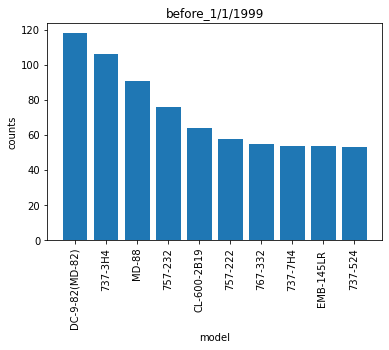

In [48]:
x =[
    
'DC-9-82(MD-82)',
'737-3H4',
'MD-88',
'757-232',
'CL-600-2B19',
'757-222',
'767-332',
'737-7H4',
'EMB-145LR ',
'737-524']


y = [118,
106,
91,
76,
64,
58,
55,
54,
54,
53]



plt.bar(x,y)
plt.xlabel("model")
plt.ylabel('counts')
plt.title('before_1/1/1999')
plt.xticks(rotation = 90);

plt.show()

## What are the models adopted in the aviation industry after 1/1/2000?

In [49]:
most_model_af2000=after_2000.model.value_counts()
most_model_af2000.head(10)

CL-600-2B19    319
737-7H4        244
A320-232       204
EMB-145LR      159
CL-600-2C10    156
EMB-145XR      104
717-200         93
CL600-2D24      66
737-824         62
EMB-135KL       58
Name: model, dtype: int64

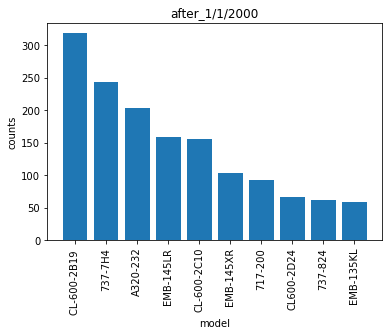

In [50]:
x = ['CL-600-2B19 ',
'737-7H4',
'A320-232',
'EMB-145LR',
'CL-600-2C10',
'EMB-145XR',
'717-200',
'CL600-2D24',
'737-824',
'EMB-135KL'  
]
y = [319,
244,
204,
159,
156,
104,
93,
66,
62,
58]
#تغير لون محدد في البارت شارت 

#نضع c هنا 
plt.bar(x,y)
plt.xlabel("model")
plt.ylabel('counts')
plt.title('after_1/1/2000')
plt.xticks(rotation = 90);

plt.show()

# Conclusions:
## 1) The dependency ratio for the models from 1976 to 2008 is as follows:
    
    
- CL-600-2B19 =        9%
- 737-7H4  =           7%
- A320-232  =          5%
- EMB-145LR  =         5%
- CL-600-2C10 =        4%
- 737-3H4      =       3%
- DC-9-82(MD-82)=      3%
- MD-88          =     3%
- 757-232         =    3%
- EMB-145XR        =   2%

## Before 1/1/2000:
1) The aviation industry has been heavily dependent on the DC-9-82 (MD-82), 118 aircraft

2) The second most common model is the 737-3H4, which was applied to 106 aircraft

3) The third most common model is the MD-88, which has been applied to 91 different aircraft

## After 1/1/200:

1) The most common model is the CL-600-2B19, it has been applied to 319 aircraft

2) In second place the 737-7H4 model, it was applied to 244 aircraft

3) In third place, the A320-232 model was applied to 204 aircraft

# Perceptions:
We must note that the model industry has been greatly affected by the progress of the years and the development of technology and heavy engines, so it cannot be judged at all that the models in the years 2000 are the best or that the models in the time of the 90's were ok! Science has advanced and technology has evolved a lot after the millennium years, so it is not fair to compare which is better now because models are not static. They have changed with the change of years.

---
---

# D- Type : 

![](pl8.jpg)

# corporation:
A corporation is an organization—usually a group of people or a company—authorized by the state to act as a single entity (a legal entity; a legal person in legal context) and recognized as such in law for certain purposes


# Foreign corporation 
Foreign corporation is a term used in the United States to describe an existing corporation (or other type of corporate entity, such as a limited liability company or LLC) that conducts business in a state or jurisdiction other than where it was originally incorporated.[1] The term applies both to domestic corporations that are incorporated in another state and to corporations that are incorporated in a nation other than the United States. All states require that foreign corporations register with the state before conducting business in the state.[2]


# Co-ownership 
Co-ownership is a legal concept in a business where two or more co-owners share the legal ownership of property.



# Partnership
A partnership is an arrangement where parties, known as business partners, agree to cooperate to advance their mutual interests. The partners in a partnership may be individuals, businesses, interest-based organizations, schools, governments or combinations. Organizations may partner to increase the likelihood of each achieving their mission and to amplify their reach. A partnership may result in issuing and holding equity or may be only governed by a contract.


##  1) What was the most popular type 1976-2008?

In [51]:
type=data_archive['type'].value_counts()
type

Corporation            4297
Individual               19
Foreign Corporation      10
Co-Owner                  5
Partnership               1
Name: type, dtype: int64

### Statistics:

|Corporation|Individual|Foreign Corporation|Co-Owner |Partnership|
|---|---|---|--- |---|
| 4397| 19| 10 | 5 | 1|

## 2) What is the most common type 1976-2000?

In [52]:
type_be_2000=before_2000.type.value_counts()
type_be_2000

Corporation    1580
Individual       13
Co-Owner          4
Name: type, dtype: int64

### Statistics:

|Corporation|Individual|Co-Owner |Partnership|
|---|---|---|--- |
| 1580| 13| 10 | 4 |

## 3) What is the most common type 2000-2001?

In [53]:
type_af_2000=after_2000.type.value_counts()
type_af_2000

Corporation            2717
Foreign Corporation      10
Individual                6
Co-Owner                  1
Partnership               1
Name: type, dtype: int64

### Statistics:

|Corporation|Individual|Foreign Corporation|Co-Owner |Partnership|
|---|---|---|--- |---|
| 2717| 6| 10 | 1 | 1|

# Perceptions:
We note that it is natural that the corporation is the most common type because it serves a very large category and is effective for government, private, commercial or industrial operations.

---
---

## 4)  What are the strongest manufacturers of the Corporation type ?!

In [54]:
Corporation=data_archive.loc[(data_archive['type']=='Corporation'),
                        ['manufacturer','model','type','engine_type','month_years','years']]
Corporation.sort_values('years')

,manufacturer,model,type,engine_type,month_years,years
698,MCDONNELL DOUGLAS,DC-9-82(MD-82),Corporation,Turbo-Fan,1984-Jan,1984
971,BOEING,737-3H4,Corporation,Turbo-Fan,1984-Dec,1984
850,MCDONNELL DOUGLAS,DC-9-82(MD-82),Corporation,Turbo-Fan,1985-Aug,1985
2136,BOEING,757-251,Corporation,Turbo-Jet,1985-Apr,1985
390,BOEING,737-3TO,Corporation,Turbo-Jet,1985-Sep,1985
...,...,...,...,...,...,...
3533,BOEING,737-73A,Corporation,Turbo-Fan,2008-Jul,2008
3963,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,2008-Jan,2008
1404,BOEING,737-924ER,Corporation,Turbo-Fan,2008-Mar,2008
3540,BOEING,737-73A,Corporation,Turbo-Fan,2008-Jul,2008


In [55]:
Corporation['manufacturer'].value_counts()

BOEING                            2023
EMBRAER                            569
BOMBARDIER INC                     517
AIRBUS INDUSTRIE                   418
MCDONNELL DOUGLAS                  251
AIRBUS                             236
MCDONNELL DOUGLAS AIRCRAFT CO      105
CANADAIR                            83
DOUGLAS                             36
MCDONNELL DOUGLAS CORPORATION       14
DEHAVILLAND                         14
CESSNA                               6
SAAB-SCANIA                          5
AEROSPATIALE/ALENIA                  4
BEECH                                3
PIPER                                3
GULFSTREAM AEROSPACE                 2
AGUSTA SPA                           1
DIAMOND AIRCRAFT IND INC             1
AVIAT AIRCRAFT INC                   1
HELIO                                1
SIKORSKY                             1
BELL                                 1
COBB INTL/DBA ROTORWAY INTL IN       1
BOEING OF CANADA LTD                 1
Name: manufacturer, dtype

In [56]:
Corporation.manufacturer.value_counts(normalize=True)*100

BOEING                            47.079358
EMBRAER                           13.241797
BOMBARDIER INC                    12.031650
AIRBUS INDUSTRIE                   9.727717
MCDONNELL DOUGLAS                  5.841285
AIRBUS                             5.492204
MCDONNELL DOUGLAS AIRCRAFT CO      2.443565
CANADAIR                           1.931580
DOUGLAS                            0.837794
MCDONNELL DOUGLAS CORPORATION      0.325809
DEHAVILLAND                        0.325809
CESSNA                             0.139632
SAAB-SCANIA                        0.116360
AEROSPATIALE/ALENIA                0.093088
BEECH                              0.069816
PIPER                              0.069816
GULFSTREAM AEROSPACE               0.046544
AGUSTA SPA                         0.023272
DIAMOND AIRCRAFT IND INC           0.023272
AVIAT AIRCRAFT INC                 0.023272
HELIO                              0.023272
SIKORSKY                           0.023272
BELL                            

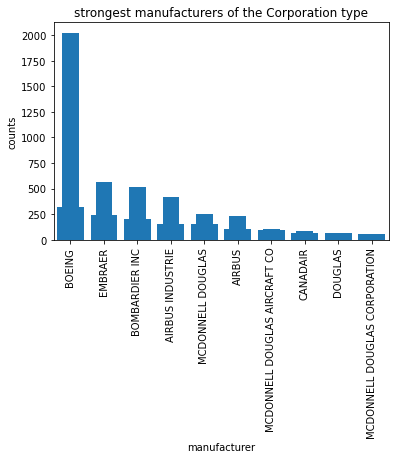

In [57]:
Corporation['manufacturer'].value_counts().head(10).plot.bar()
plt.bar(x,y)
plt.xlabel("manufacturer")
plt.ylabel('counts')

plt.title('strongest manufacturers of the Corporation type');




## Conclusions:

1) One of the emerging and successful veteran companies is BOEING, 2023 was recorded in its balance, based on current data, 47% of trips belong to BOEING

2) The second largest airline is EMBRAER with 13% of total flights, with a class of 569

3) The third largest airline is BOMBARDIER INC with 12%, with a score of 517

## 5) What are the strongest manufacturers of the Individual type ?!

In [58]:
Individual=data_archive.loc[(data_archive['type']=='Individual'),
                        ['manufacturer','model','type','engine_type','month_years','years']]
Individual.sort_values('years')

,manufacturer,model,type,engine_type,month_years,years
2473,DEHAVILLAND,OTTER DHC-3,Individual,Reciprocating,1976-Jan,1976
1834,CESSNA,182P,Individual,Reciprocating,1978-Mar,1978
2400,LEBLANC GLENN T,FALCON XP,Individual,Reciprocating,1985-Sep,1985
4575,MAULE,M-5-235C,Individual,Reciprocating,1986-Aug,1986
852,BEECH,65-A90,Individual,Turbo-Prop,1987-Apr,1987
2381,STINNETT RON,FALCON XP,Individual,Reciprocating,1987-Mar,1987
1409,CESSNA,182A,Individual,Reciprocating,1987-Jul,1987
2003,MCDONNELL DOUGLAS,DC-9-82(MD-82),Individual,Turbo-Fan,1989-Feb,1989
4545,MAULE,M-5-235C,Individual,Reciprocating,1991-Jan,1991
2500,BOEING,757-222,Individual,Turbo-Jet,1993-Sep,1993


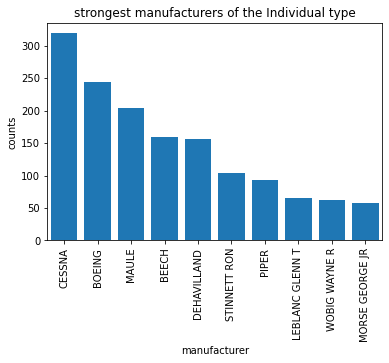

In [59]:
Individual['manufacturer'].value_counts().head(10).plot.bar();
plt.bar(x,y)
plt.xlabel("manufacturer")
plt.ylabel('counts')
plt.title('strongest manufacturers of the Individual type');


In [60]:
Individual['manufacturer'].value_counts()

CESSNA               4
BOEING               2
MAULE                2
BEECH                2
DEHAVILLAND          1
STINNETT RON         1
PIPER                1
LEBLANC GLENN T      1
WOBIG WAYNE R        1
MORSE GEORGE JR      1
AERO COMMANDER       1
FRIEDEMANN JON       1
MCDONNELL DOUGLAS    1
Name: manufacturer, dtype: int64

## Conclusions:

In total, the number of trips in this type is numbered.
1) Cessna has 4 personal tours

2) MAULE only had two trips

3) BEECH only has two trips

---
---

----
----

# E- Engine Type : 

![](pl7.jpg)

## 1) What are the most popular types of engines 1976-2008?

In [61]:
engine_type=data_archive['engine_type'].value_counts()
engine_type

Turbo-Fan        2798
Turbo-Jet        1410
Turbo-Prop         89
Reciprocating      28
4 Cycle             4
Turbo-Shaft         3
Name: engine_type, dtype: int64

### Statistics:

|Turbo-Fan|Turbo-Jet|Turbo-Prop|Reciprocating |4 Cycle|Turbo-Shaft  |
|---|---|---|--- |---|---|
| 2798| 1410| 89 | 28 | 4| 3 |

# Turbo-Fan:

The turbofan or fanjet is a type of airbreathing jet engine that is widely used in aircraft propulsion. The word "turbofan" is a portmanteau of "turbine" and "fan": the turbo portion refers to a gas turbine engine which achieves mechanical energy from combustion,[1] and the fan, a ducted fan that uses the mechanical energy from the gas turbine to accelerate air rearwards. Thus, whereas all the air taken in by a turbojet passes through the turbine (through the combustion chamber), in a turbofan some of that air bypasses the turbine. A turbofan thus can be thought of as a turbojet being used to drive a ducted fan, with both of these contributing to the thrust.

# Turbo-Jet
The turbojet is an airbreathing jet engine, typically used in aircraft. It consists of a gas turbine with a propelling nozzle. The gas turbine has an air inlet, a compressor, a combustion chamber, and a turbine (that drives the compressor). The compressed air from the compressor is heated by burning fuel in the combustion chamber and then allowed to expand through the turbine. The turbine exhaust is then expanded in the propelling nozzle where it is accelerated to high speed to provide thrust.[1] Two engineers, Frank Whittle in the United Kingdom and Hans von Ohain in Germany, developed the concept independently into practical engines during the late 1930s.

# Turbo-Prop

A turboprop engine is a turbine engine that drives an aircraft propeller.[1]

In its simplest form a turboprop consists of an intake, compressor, combustor, turbine, and a propelling nozzle.[2] Air is drawn into the intake and compressed by the compressor. Fuel is then added to the compressed air in the combustor, where the fuel-air mixture then combusts. The hot combustion gases expand through the turbine. Some of the power generated by the turbine is used to drive the compressor. Thrust is obtained by the combusting gases, pushing toward a (vectored) surface in front of the expanding gas.

The rest is transmitted through the reduction gearing to the propeller. Further expansion of the gases occurs in the propelling nozzle, where the gases exhaust to atmospheric pressure. The propelling nozzle provides a relatively small proportion of the thrust generated by a turboprop.[3]

In contrast to a turbojet, the engine's exhaust gases do not generally contain enough energy to create significant thrust, since almost all of the engine's power is used to drive the propeller.

## 2) What types of engines were used in 1976-2000?

In [62]:
engine_be_2000=before_2000.engine_type.value_counts()
engine_be_2000

Turbo-Fan        864
Turbo-Jet        655
Turbo-Prop        57
Reciprocating     19
4 Cycle            2
Name: engine_type, dtype: int64

### Statistics:

|Turbo-Fan|Turbo-Jet|Turbo-Prop|Reciprocating |4 Cycle|Turbo-Shaft  |
|---|---|---|--- |---|---|
| 864 | 655 | 57 | 19| 2 | 0 |

In [63]:
engine_af_2000=after_2000.engine_type.value_counts()
engine_af_2000

Turbo-Fan        1934
Turbo-Jet         755
Turbo-Prop         32
Reciprocating       9
Turbo-Shaft         3
4 Cycle             2
Name: engine_type, dtype: int64

## Statistics:

|Turbo-Fan|Turbo-Jet|Turbo-Prop|Reciprocating |4 Cycle|Turbo-Shaft  |
|---|---|---|--- |---|---|
| 1934 | 755 | 32 | 9 | 2 | 3 |

# Conclusions:
## From 1976 to 2008

1) Turbo-Fan is the most common type of motor used for various trips
If 2798 aircraft are registered operating on this model

2) In second place were registered 1,410 aircraft powered by Turbo-Jet engine

3) The Turbo-Prop works on 89 different aircraft

## Before 2000:

1) The Turbo-Fan Engine Industry was in the lead, 864 aircraft were registered operating on this engine

2) In second place was the Turbo-Jet engine, 655 different aircraft that were powered by the Turbo-Jet engine

3) In third place was the Turbo-Prop engine, on which 57 aircraft were based
The rest is like what is mentioned in the table

## After 2000:

1) In the first place in the aircraft engine industry was the Turbo-Fan, which was based on 1934 different aircraft

2) In second place was the Turbo-Jet engine, which was used in 755 aircraft

3) A new type of engine appeared in the fourth place, a Turbo-Shaft, that did not have a high market value

### 3)  Comparison of Demand for Engine Types in the "Pre-2000 and Post-2000" Periods :

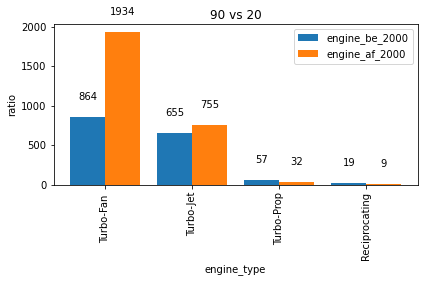

In [64]:
a = ['Turbo-Fan ', 'Turbo-Jet', 'Turbo-Prop', 'Reciprocating']
engine_be_2000 = [ 864 , 655 , 57 ,19 ]
engine_af_2000=[ 1934 ,755, 32, 9]

x = np.arange(len(a))  
width = 0.40

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, engine_be_2000, width, label='engine_be_2000')
rects2 = ax.bar(x + width/2, engine_af_2000, width, label='engine_af_2000')

ax.set_xlabel('engine_type')
ax.set_ylabel('ratio')
ax.set_title('90 vs 20')
ax.set_xticks(x)
ax.set_xticklabels(a)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,15), 
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.xticks(rotation = 90);

autolabel(rects1)
autolabel(rects2) 
fig.tight_layout()
fontsize = 40
plt.show()

# Conclusions:





1) We notice from the graphical visualization the industrial jump in the engine industry in the period before the year 2000 and after the year 2000,


2) We note that there is a high demand for the Turbo-Fan, with a difference of 1070 applications in recent years
Meaning that the increase was by 45%.

3)There is a 17% increase in demand for the Turbo-Jet engine

4) 0,8% downturn in Turbo-Prop engine demand

5) 0,2% downturn in Reciprocating engine demand

---
---

---
---

# F- Manufacturer BOEING :

![](pl4.jpg)

s an American multinational corporation that designs, manufactures, and sells airplanes, rotorcraft, rockets, satellites, telecommunications equipment, and missiles worldwide. The company also provides leasing and product support services. Boeing is among the largest global aerospace manufacturers; it is the second-largest defense contractor in the world based on 2018 revenue,[6] and is the largest exporter in the United States by dollar value.[7] Boeing stock is included in the Dow Jones Industrial Average. Boeing is incorporated in Delaware.[8]

Boeing was founded by William Boeing in Seattle, Washington on July 15, 1916.[9] The present corporation is the result of the merger of Boeing with McDonnell Douglas on August 1, 1997. Then chairman and CEO of Boeing, Philip M. Condit, assumed those roles in the combined company, while Harry Stonecipher, former CEO of McDonnell Douglas, became president and COO.[9]

In [65]:
manufacturer_BOEING=data_archive.loc[(data_archive['manufacturer']=='BOEING'),
                        ['manufacturer','model','type','engine_type','month_years','years']]
manufacturer_BOEING.sort_values('years')

,manufacturer,model,type,engine_type,month_years,years
971,BOEING,737-3H4,Corporation,Turbo-Fan,1984-Dec,1984
390,BOEING,737-3TO,Corporation,Turbo-Jet,1985-Sep,1985
128,BOEING,737-3TO,Corporation,Turbo-Jet,1985-Oct,1985
981,BOEING,737-3H4,Corporation,Turbo-Fan,1985-Jan,1985
258,BOEING,737-3TO,Corporation,Turbo-Jet,1985-Sep,1985
...,...,...,...,...,...,...
4572,BOEING,737-7H4,Corporation,Turbo-Fan,2008-May,2008
4557,BOEING,737-7H4,Corporation,Turbo-Fan,2008-Apr,2008
4543,BOEING,737-7H4,Corporation,Turbo-Fan,2008-Apr,2008
347,BOEING,737-524,Corporation,Turbo-Fan,2008-Feb,2008


## 1) What are the most active years?

In [66]:
manufacturer_BOEING.years.value_counts()

2006    171
2004    170
2001    170
1999    163
2000    150
1998    131
2005    131
2007    127
2002    102
1997     92
2003     79
1996     64
1990     57
1992     57
1991     57
1995     51
1994     42
2008     41
1993     38
1988     33
1989     32
1987     27
1986     22
1985     17
1984      1
Name: years, dtype: int64

 The major company in the aircraft industry is witnessing great activity as the most effective year is 2006, as it recorded 171 different flights in second place in 2001-2004, and the two years recorded 170 different flights

## 2) What is the growth of the company ?! Is it a positive or negative relationship ?

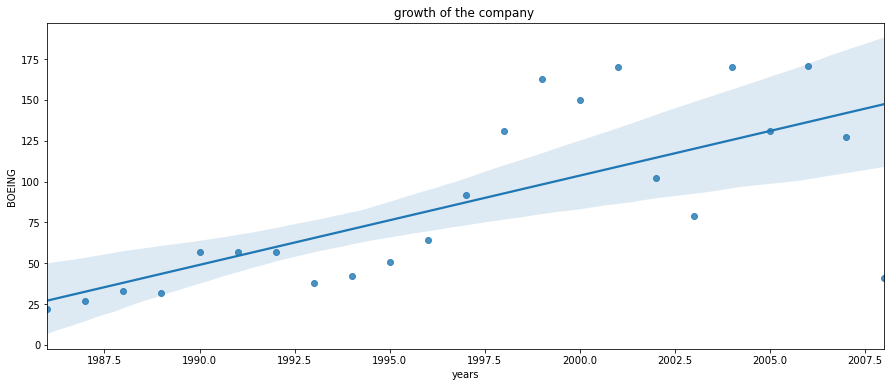

In [67]:
plt.figure(figsize=[15,6])
sns.regplot(data = manufacturer_BOEING,
            x = [2006,2004,2001,1999,2000,2005,1998,2007,2002,1997,2003,
                 1996,1991,1990,1992,1995,1994,2008,1993,1988,1989,1987,1986],
             y = [171,170,170,163,150,131,131,127,102,92,79,64,57,
                  57,57,51,42,41,38,33,32,27,22]);

plt.xlabel('years')
plt.ylabel('BOEING');
plt.title('growth of the company ');






We note that the company has a clear and effective growth in the aviation industry, the relationship recorded here is positive 

## 3) What are the most used models?

In [68]:
manufacturer_BOEING.model.value_counts().head(10)


737-7H4    298
737-3H4    147
757-232    111
757-222     96
737-824     94
717-200     93
767-332     77
737-832     68
737-322     64
737-524     56
Name: model, dtype: int64

In [69]:
manufacturer_BOEING.model.value_counts(normalize=True)*100

737-7H4     14.716049
737-3H4      7.259259
757-232      5.481481
757-222      4.740741
737-824      4.641975
              ...    
737-2Y5      0.049383
747-2B5F     0.049383
737-2P6      0.049383
737-7Q8      0.049383
747-451      0.049383
Name: model, Length: 85, dtype: float64

''

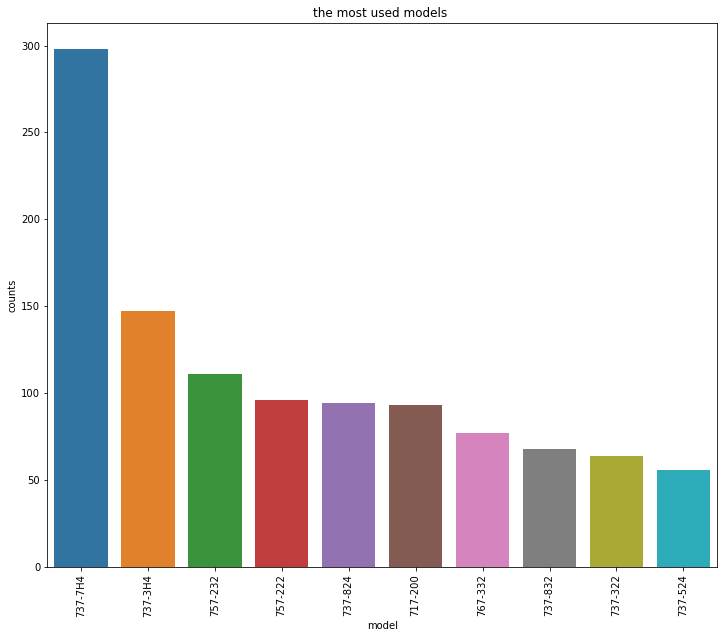

In [70]:
plt.figure(figsize = (12,10));

sns.barplot(x = ['737-7H4','737-3H4','757-232','757-222','737-824','717-200','767-332',
                 '737-832','737-322','737-524'],
           
            y =[298,147,111,96,94,93,77,68,64,56]);
plt.xticks(rotation = 90);


plt.xlabel('model')
plt.ylabel('counts');
plt.title('the most used models ')
;

298 737-7H4 aircraft, an average of 15% of all models; in second place was the 737-3H4 7%.

## 4) What are the most common engines?

In [71]:
manufacturer_BOEING.engine_type.value_counts()


Turbo-Fan    1264
Turbo-Jet     761
Name: engine_type, dtype: int64

The most common engine is the Turbo-Fan, with 1264 aircraft running on this engine, while the rest of the aircraft are powered by a Turbo-Jet engine.

## 5) What is the most effective month?

In [72]:
manufacturer_BOEING.month_years.value_counts().head(12)

2004-May    62
2006-Feb    28
1999-Dec    26
2001-May    26
2006-Jul    24
2000-Aug    24
2007-Jun    23
2005-Apr    20
2000-Sep    20
2004-Jul    20
1999-Sep    19
2001-Jul    18
Name: month_years, dtype: int64

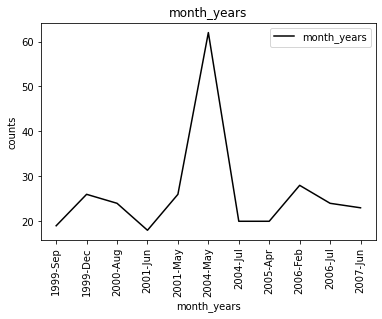

In [73]:
a=['1999-Sep','1999-Dec','2000-Aug','2001-Jun','2001-May',
   '2004-May','2004-Jul','2005-Apr','2006-Feb','2006-Jul','2007-Jun']
b=[19,26,24,18,26,62,20,20,28,24,23]


plt.plot(a,b,'k')

plt.legend(['month_years','counts'])
plt.title('month_years')
plt.xlabel('month_years')
plt.xticks(rotation = 90)
plt.ylabel('counts')

plt.show()

The infographic shows that the most active month is May of 2004, so if it recorded 62 different air movements, we note that the second month was February of 2006 if it recorded 28 different flights.

# Conclusions:

1) The great company in the aircraft industry is witnessing significant activity
As the most effective year is 2006, it records 171 different flights
In second place in 2001-2004, the two years recorded 170 different trips

2) We notice that the company has a clear and effective growth in the aviation industry, as the relationship recorded here is positive 

3) 298 aircraft feature the 737-7H4, an average of 15% of all models
In second place was the 737-3H4, with a rate of 7%.

4) The most common engine is the Turbo-Fan, as there are 1264 running on this engine
The rest of the aircraft are powered by the Turbo-Jet engine.

5) The infographic shows that the most active month is May of 2004, if it recorded 62 different air movements, we note that the second month was February of 2006 if it recorded 28 different flights

---
---

# G- BOMBARDIER_INC :

 is a Canadian multinational that founded in 1942 by Joseph-Armand Bombardier. It is a manufacturer of business jets, public transport vehicles, and trains, with the latter two businesses pending sale to Alstom. It was also formerly a manufacturer of commercial jets and recreational vehicles, with the latter being spun-off as Bombardier Recreational Products. Its Bombardier Aviation division is headquartered in Montreal, and Bombardier Transportation in Berlin, Germany. The company was orginally created to produce snowmobiles, but it expanded into the aviation, rail, and public transit businesses.

Bombardier manufactures several series of corporate jets, Global 7500, Global Express, Challenger 600, Challenger 300, and Learjet 70/75.

In [74]:
manufacturer_BOMBARDIER_INC=data_archive.loc[(data_archive['manufacturer']=='BOMBARDIER INC'),
                        ['manufacturer','model','type','engine_type','month_years','years']]
manufacturer_BOMBARDIER_INC.sort_values('years')

,manufacturer,model,type,engine_type,month_years,years
2915,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,1998-Jul,1998
469,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,1999-Dec,1999
3736,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,1999-Dec,1999
3735,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,1999-Dec,1999
3733,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,1999-Dec,1999
...,...,...,...,...,...,...
3421,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,2008-Jan,2008
3978,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,2008-Jan,2008
1641,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,2008-Jan,2008
1669,BOMBARDIER INC,CL-600-2B19,Corporation,Turbo-Fan,2008-Jan,2008


## 1) What is the most active year?

In [75]:
manufacturer_BOMBARDIER_INC.years.value_counts().head(10)

2003    102
2004     91
2005     84
2007     78
2002     54
2001     40
2008     26
2006     20
2000     13
1999     11
Name: years, dtype: int64

In [76]:
manufacturer_BOMBARDIER_INC.years.value_counts(normalize=True)*100

2003    19.615385
2004    17.500000
2005    16.153846
2007    15.000000
2002    10.384615
2001     7.692308
2008     5.000000
2006     3.846154
2000     2.500000
1999     2.115385
1998     0.192308
Name: years, dtype: float64

/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


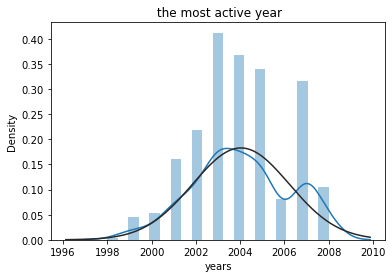

In [94]:
from scipy.stats import norm
sns.distplot(manufacturer_BOMBARDIER_INC.years, fit=norm );
plt.title(' the most active year');


- The most active year is the year 2003, when 102 different flights were registered, operating 20% of all flights
- year 2004 was an excellent aviation activity, with 91 flights recorded operating 18% of all flights

## 3) What is the most active month in air navigation?

In [78]:
manufacturer_BOMBARDIER_INC.month_years.value_counts().head(10)


2005-Sep    51
2004-Apr    32
2007-Dec    26
2008-Jan    20
2003-Oct    19
2003-Aug    18
2002-Jan    16
2003-Jan    15
2004-Dec    13
2005-Oct    12
Name: month_years, dtype: int64

In [79]:
manufacturer_BOMBARDIER_INC.month_years.value_counts(normalize=True)*100

2005-Sep    9.807692
2004-Apr    6.153846
2007-Dec    5.000000
2008-Jan    3.846154
2003-Oct    3.653846
              ...   
2000-Oct    0.192308
2001-Feb    0.192308
2008-May    0.192308
2002-May    0.192308
2000-Apr    0.192308
Name: month_years, Length: 88, dtype: float64

September 2005 was one of the most efficient months, with 51 flights per month

## 4) What is the model most used and applied?

In [80]:
manufacturer_BOMBARDIER_INC.model.value_counts().head(10)


CL-600-2B19    298
CL-600-2C10    156
CL600-2D24      66
Name: model, dtype: int64

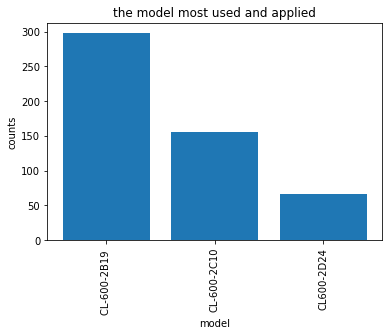

In [81]:
x = ['CL-600-2B19 ','CL-600-2C10','CL600-2D24']
y = [298,156,66]
#تغير لون محدد في البارت شارت 

#نضع c هنا 
plt.bar(x,y)
plt.xlabel("model")
plt.ylabel('counts')
plt.title('the model most used and applied')
plt.xticks(rotation = 90);

plt.show()

The most used model is the CL-600-2B19, with 298 aircraft carrying the same model

## 5) What are the most active months in using the most common model?

In [82]:

BOMBARDIER= manufacturer_BOMBARDIER_INC.loc[(manufacturer_BOMBARDIER_INC['manufacturer']== 'BOMBARDIER INC')&(manufacturer_BOMBARDIER_INC['model']=='CL-600-2B19'),
                                ['month_years','engine_type']]



In [83]:
BOMBARDIER.month_years.value_counts()

2004-Apr    26
2005-Sep    17
2003-Aug    16
2008-Jan    16
2007-Dec    15
            ..
2006-Aug     1
2007-Feb     1
2008-Jun     1
2002-Aug     1
2000-Apr     1
Name: month_years, Length: 63, dtype: int64

One of the most active months for aircraft with the CL-600-2B19 is April 2004, if 26 flights were recorded, also in September 2005, 17 different flights were recorded

# Conclusions:
1) The most active year is 2003, with 102 different flights recorded

2) In second place, the year 2004 constitutes an excellent flight activity, if 91 flights are recorded

3) One of the most effective months was September of 2005, if it contained 51 flights per month

4) The most used model is the CL-600-2B19, as there are 298 aircraft carrying the same model

5) One of the most active months for aircraft featuring the CL-600-2B19 model, is April of 2004, if 26 flights were recorded, also September of 2005, 17 different flights were recorded.


# Perceptions:
1) The company has good activity in recent years, which is 5% of all trips activity in different years

2) All three models, based on the statistics, are necessary

---
---

---
---

# H- EMBRAER :

is a Brazilian aerospace conglomerate that produces commercial, military, executive and agricultural aircraft[6] and provides aeronautical services. It was founded in 1969 in São José dos Campos, São Paulo, where its headquarters are located. The company is the third largest producer of civil aircraft, after Boeing and Airbus.[7]

On 26 February 2019, Embraer and Boeing announced the acquisition of an 80% share of Embraer's commercial division, which would take the name Boeing Brasil – Commercial, and market the E-Jet and E-Jet E2 series of narrow-body short-to medium-range twin-engine jet airliners.[8] The deal was canceled in April 2020 when Boeing felt that its demands could not be satisfied. Embraer alleged that Boeing was in financial trouble after being heavily affected by the reduction of demand caused by the COVID-19 pandemic and, to a lesser degree, the disasters involving flaws in its 737 MAX airplanes, led to the deal being broken.

1) What was the first engine type recorded in the data and in what year?

2) What is the most active month in air traffic, and how many flights are registered?

3) What is the general activity of EMBRAER in air navigation traffic?

4) What is the most common model in EMBRAER?

5) What is the activity log for the most popular model ?

6) What does the airline  EMBRAER depend on for its engines?



---
---

## 1) What was the first engine type recorded in the data and in what year ?

In [84]:
manufacturer_EMBRAER=data_archive.loc[(data_archive['manufacturer']=='EMBRAER'),
                        ['manufacturer','model','type','engine_type','month_years','years']]
manufacturer_EMBRAER.sort_values('years')

,manufacturer,model,type,engine_type,month_years,years
667,EMBRAER,EMB-120ER,Corporation,Turbo-Prop,1993-Oct,1993
662,EMBRAER,EMB-120,Corporation,Turbo-Prop,1993-Sep,1993
658,EMBRAER,EMB-120ER,Corporation,Turbo-Prop,1993-May,1993
681,EMBRAER,EMB-120ER,Corporation,Turbo-Prop,1994-Jul,1994
687,EMBRAER,EMB-120ER,Corporation,Turbo-Prop,1995-Mar,1995
...,...,...,...,...,...,...
2485,EMBRAER,EMB-120ER,Corporation,Turbo-Prop,2007-Jun,2007
930,EMBRAER,ERJ 190-100 IGW,Corporation,Turbo-Fan,2008-Feb,2008
920,EMBRAER,ERJ 190-100 IGW,Corporation,Turbo-Fan,2008-Feb,2008
4865,EMBRAER,ERJ 190-100 IGW,Corporation,Turbo-Fan,2008-Feb,2008



 The first flight recorded in the data was in October 1993 of a company type, and the engine type
 was: Turbo-Prop


## 2) What is the most active month in air traffic, and how many flights are registered?



In [85]:
manufacturer_EMBRAER.month_years.value_counts(normalize=True)*100

2000-Oct    7.381371
2003-Jun    4.745167
2002-May    4.569420
1999-Jun    2.108963
2002-Jul    2.108963
              ...   
2000-Aug    0.175747
2002-Nov    0.175747
1996-May    0.175747
2000-Jun    0.175747
1997-Oct    0.175747
Name: month_years, Length: 131, dtype: float64

In [86]:
manufacturer_EMBRAER.month_years.value_counts().head(10)

2000-Oct    42
2003-Jun    27
2002-May    26
1999-Jun    12
2002-Jul    12
2000-Nov    11
1999-Sep    11
1998-Jul    10
1999-Jan    10
2004-Mar     9
Name: month_years, dtype: int64

The most active month in air traffic is October of 2000, if it contains 42 different flights, that is, the flights in that month accounted for 7% of the total flights of the airline EMBRAER

## 3) What is the general activity of EMBRAER in air navigation traffic?

/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


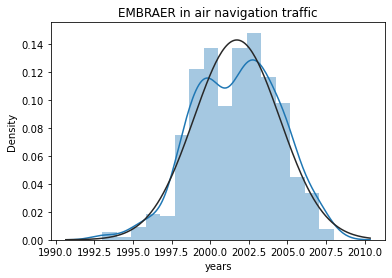

In [87]:
sns.distplot(manufacturer_EMBRAER.years, fit=norm );
plt.title('EMBRAER in air navigation traffic');

In [88]:
manufacturer_EMBRAER.years.value_counts().head(10)

2003    79
2000    73
2002    73
1999    65
2004    62
2005    52
2001    51
1998    40
2006    24
2007    18
Name: years, dtype: int64

In [89]:
manufacturer_EMBRAER.years.value_counts(normalize=True)*100

2003    13.884007
2000    12.829525
2002    12.829525
1999    11.423550
2004    10.896309
2005     9.138840
2001     8.963093
1998     7.029877
2006     4.217926
2007     3.163445
1996     1.757469
1997     1.581722
1995     0.878735
2008     0.702988
1993     0.527241
1994     0.175747
Name: years, dtype: float64


EMBRAER's activity in each of the years 2000-2002 is generally stable, with an average of 73 to 15 flights, or approximately 13% of the company's overall activity.
The most effective year is 2003, 79 trips were recorded, which is approximately 14%.

## 4) What is the most common model in EMBRAER?

In [90]:
manufacturer_EMBRAER.model.value_counts().head(10)

EMB-145LR          213
EMB-145XR          104
EMB-135KL           58
EMB-120ER           53
EMB-135LR           52
ERJ 190-100 IGW     43
EMB-145EP           23
EMB-135ER           12
EMB-120              6
EMB-145              5
Name: model, dtype: int64

4) The airline relies on most of its flights on the "EMB-145LR". Approximately 213 flights were on board aircraft of this model.

5) The most active month of the EMB-145LR is October 2000, if 27 flights all departed from the same mode, then it will follow in May 2002 if 22 flights were launched on the same model plane

## 6) What does the airline EMBRAER depend on for its engines?

In [91]:
manufacturer_EMBRAER.engine_type.value_counts(normalize=True)*100

Turbo-Fan     72.407733
Turbo-Jet     17.223199
Turbo-Prop    10.369069
Name: engine_type, dtype: float64

 The airline depends on the type of turbo-fan engine, if 72% of its flights are operated on aircraft operating on this type of engine

# Conclusions:

1) The first flight recorded in the data was in October 1993 of the type Corporation, and the engine type was: Turbo-Prop

2) The most active month in air traffic is April of 2004, if it contains 26 different flights, that is, flights in that month accounted for 9% of the total flights of the airline EMBRAER

3) The activity of EMBRAER in each of the years 2003-2005-2007-2008, in general, is fixed, ie, at a rate ranging from 17 to 15 flights, or approximately 5% of the activity for each year of them.

4) The airline relies on most of its flights on the "EMB-145LR". Approximately 213 flights were on board aircraft of this model.

5) The most active month of the EMB-145LR is October 2000, if 27 flights all departed from the same mode, then it will follow in May 2002 if 22 flights were launched on the same model plane

6) The airline depends on the type of turbo-fan engine, if 72% of its flights are operated on aircraft operating on this type of engine

# Perceptions:

1) The company is recording a noticeable decrease in its air activity, as 4 flights were detected in 2008 and it is in the lagging places in the industrial growth of aviation.

2) The EMB-145 model can be dispensed with in the future unless there is a target for its use for the company, as there are only five aircraft carrying the same model

---
---

### References :
- [Google Doc Download](https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True)
- [Data Flights](http://stat-computing.org/dataexpo/2009/the-data.html)
- [unitingaviation](https://unitingaviation.com/news/economic-development/aviation-benefits-for-a-better-future/)
- [wikipedia](https://en.wikipedia.org/wiki/Turbojet)